# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset diperoleh dari Kaggle (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

## **Data Loading**

In [45]:
# load the dataset
data = '/content/data.csv'
df = pd.read_csv(data)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Berikut adalah penjelasan rinci untuk setiap kolom pada dataset Breast Cancer
Wisconsin , yang digunakan untuk klasifikasi tumor payudara sebagai jinak (B(Benign)) atau ganas (M(Malignant)). Dataset ini berisi fitur numerik yang diekstraksi dari gambar sel tumor payudara.


*   id: Nomor identitas unik untuk setiap sampel (pasien).
*   diagnosis: Label kelas untuk tumor, menunjukkan apakah tumor bersifat jinak (B) atau ganas (M).
*   radius_mean: Rata-rata jarak dari pusat ke titik-titik pada perimeter sel.
*   texture_mean: Standar deviasi intensitas piksel dalam gambar sel.
*   perimeter_mean: Rata-rata keliling sel.
*   area_mean: Rata-rata luas area sel.
*   smoothness_mean: Variasi lokal dalam panjang radius sel.
*   compactness_mean: Rasio antara perimeter kuadrat dan area sel.
*   concavity_mean: Seberapa cekung kontur sel.
*   concave points_mean: Jumlah titik cekung pada kontur sel.
*   symmetry_mean: Tingkat simetri sel.
*   fractal_dimension_mean: pendekatan kurva terhadap dimensi fraktal.
*   radius_se: Variabilitas pengukuran radius rata-rata.
*   texture_se: Variasi dalam pengukuran tekstur.
*   perimeter_se: Ketidakpastian panjang perimeter.
*   area_se: Variasi luas area nukleus.
*   smoothness_se: Konsistensi kelicinan permukaan.
*   compactness_se: Variasi kekompakan bentuk.
*   concavity_se: Ketidakkonsistenan bagian cekung.
*   concave points_se: Variasi jumlah titik cekung.
*   symmetry_se: Fluktuasi tingkat simetri.
*   fractal_dimension_se: Variasi kompleksitas fraktal.
*   radius_worst: Radius terbesar yang terukur.
*   texture_worst: Tekstur paling tidak homogen.
*   perimeter_worst: Perimeter terpanjang.
*   area_worst: Luas terbesar.
*   smoothness_worst: Kelicinan paling tidak konsisten.
*   compactness_worst: Bentuk paling tidak kompak.
*   concavity_worst: Cekungan terdalam.
*   concave points_worst: Jumlah titik cekung terbanyak.
*   symmetry_worst: Simetri paling buruk.
*   fractal_dimension_worst: Kompleksitas fraktal tertinggi.
*   Unamed:32 : seluruhnya berisi nilai NaN (tidak ada data).

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Dikarenakan kolom id dan unnamed: 32 tidak mempengaruhi model maka akan di drop / dihapus.

In [6]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Apakah terdapat data yang terduplikat?

In [8]:
df.duplicated().sum()

np.int64(0)

dari hasil output di atas tidak ada data yang duplikat.

Apakah terdapat missing value?

In [9]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


Dari hasil output di atas tidak terdapat missing value.

In [10]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **Univariate Analysis**

Kita akan melihat histogram masing-masing fitur numerik.

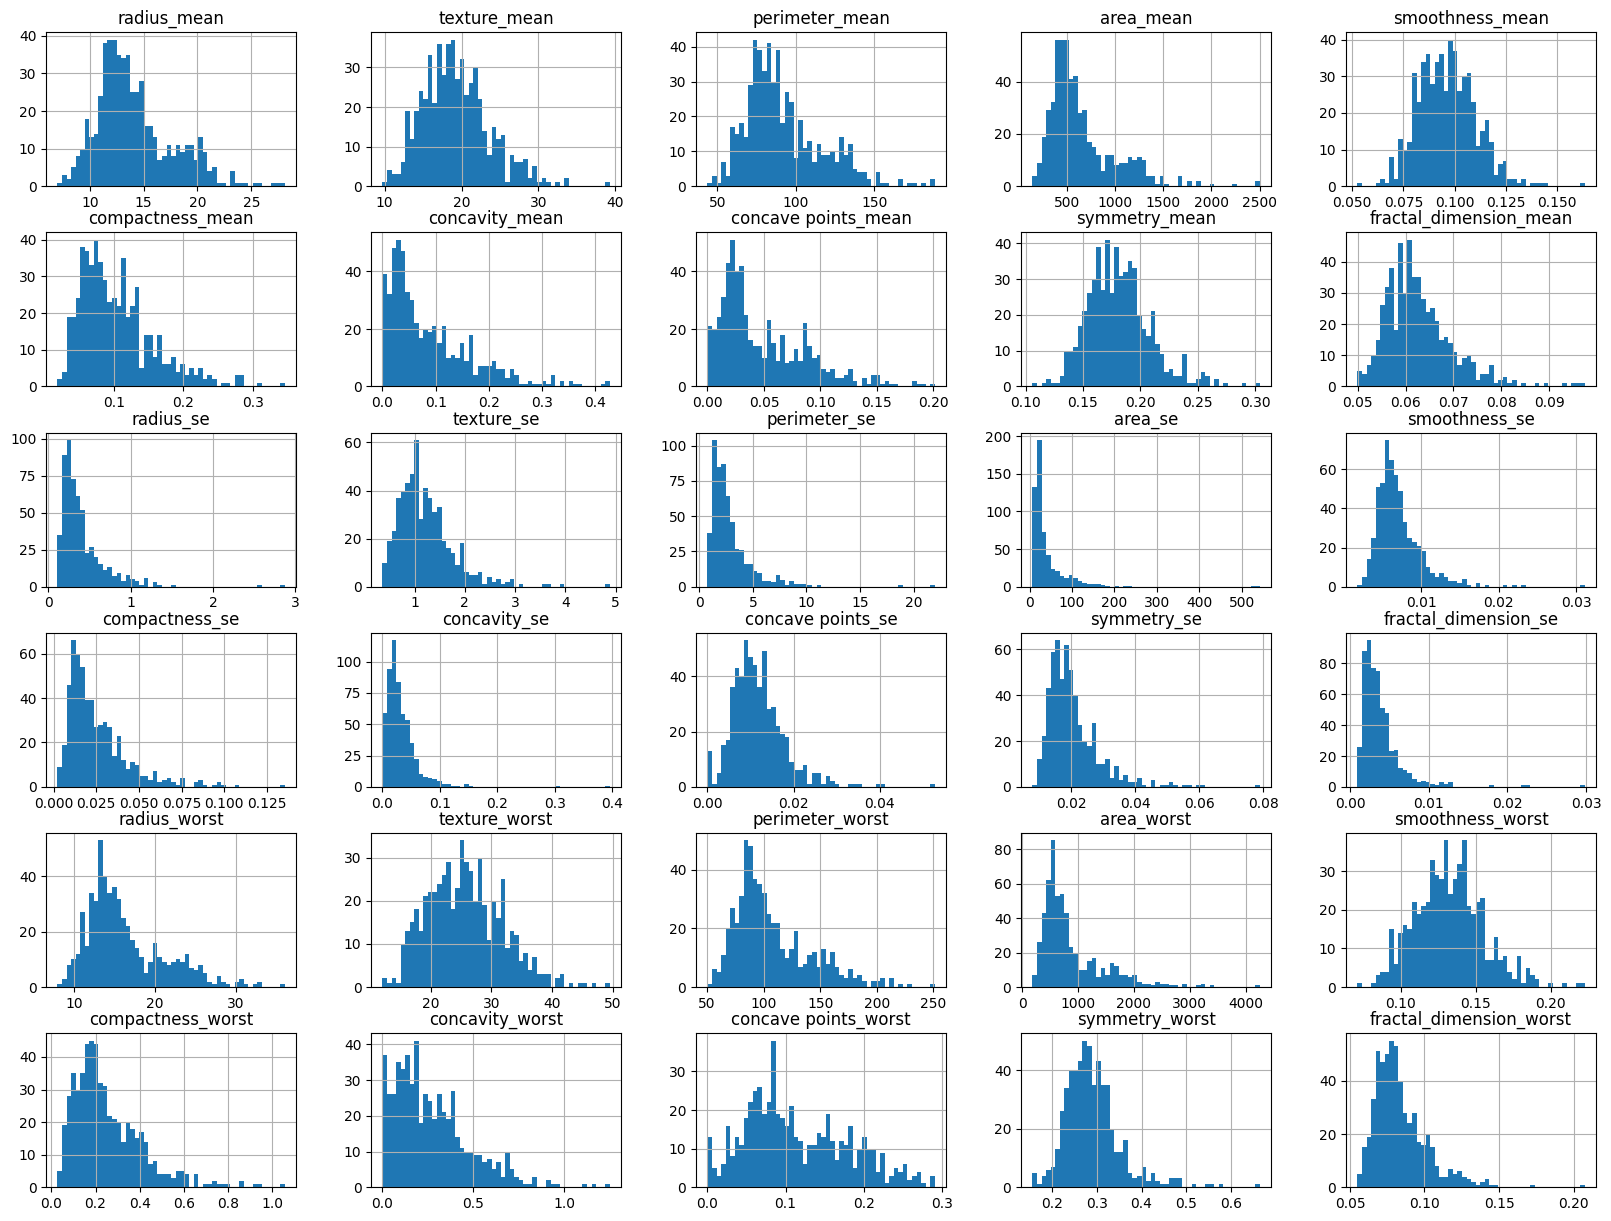

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- Beberapa fitur seperti radius_mean, perimeter_mean, dan area_mean memiliki distribusi yang hampir normal. Ini berarti nilai-nilai pada fitur tersebut tersebar secara simetris di sekitar mean.
- Beberapa fitur seperti concavity_mean, concave points_mean, dan fractal_dimension_mean memiliki distribusi yang sangat skew (tidak simetris). Nilai-nilai cenderung terkonsentrasi di satu sisi, dengan ekor panjang ke arah nilai tertentu.
- Beberapa fitur seperti radius_worst, perimeter_worst, dan area_worst memiliki rentang nilai yang sangat lebar. Histogram menunjukkan bahwa ada beberapa outlier atau nilai ekstrem yang jauh lebih besar daripada nilai-nilai lainnya.
- Beberapa fitur seperti symmetry_mean, fractal_dimension_mean, symmetry_se, dan fractal_dimension_se memiliki distribusi yang relatif kompak, dengan nilai-nilai yang cenderung berkumpul di sekitar nilai tertentu.
- Beberapa fitur seperti texture_se, perimeter_se, dan area_se memiliki distribusi yang unik, dengan beberapa puncak (modus) yang jelas. Ini bisa menjadi indikasi adanya kelompok-kelompok data yang berbeda dalam dataset.

### **Multivariate Analysis**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


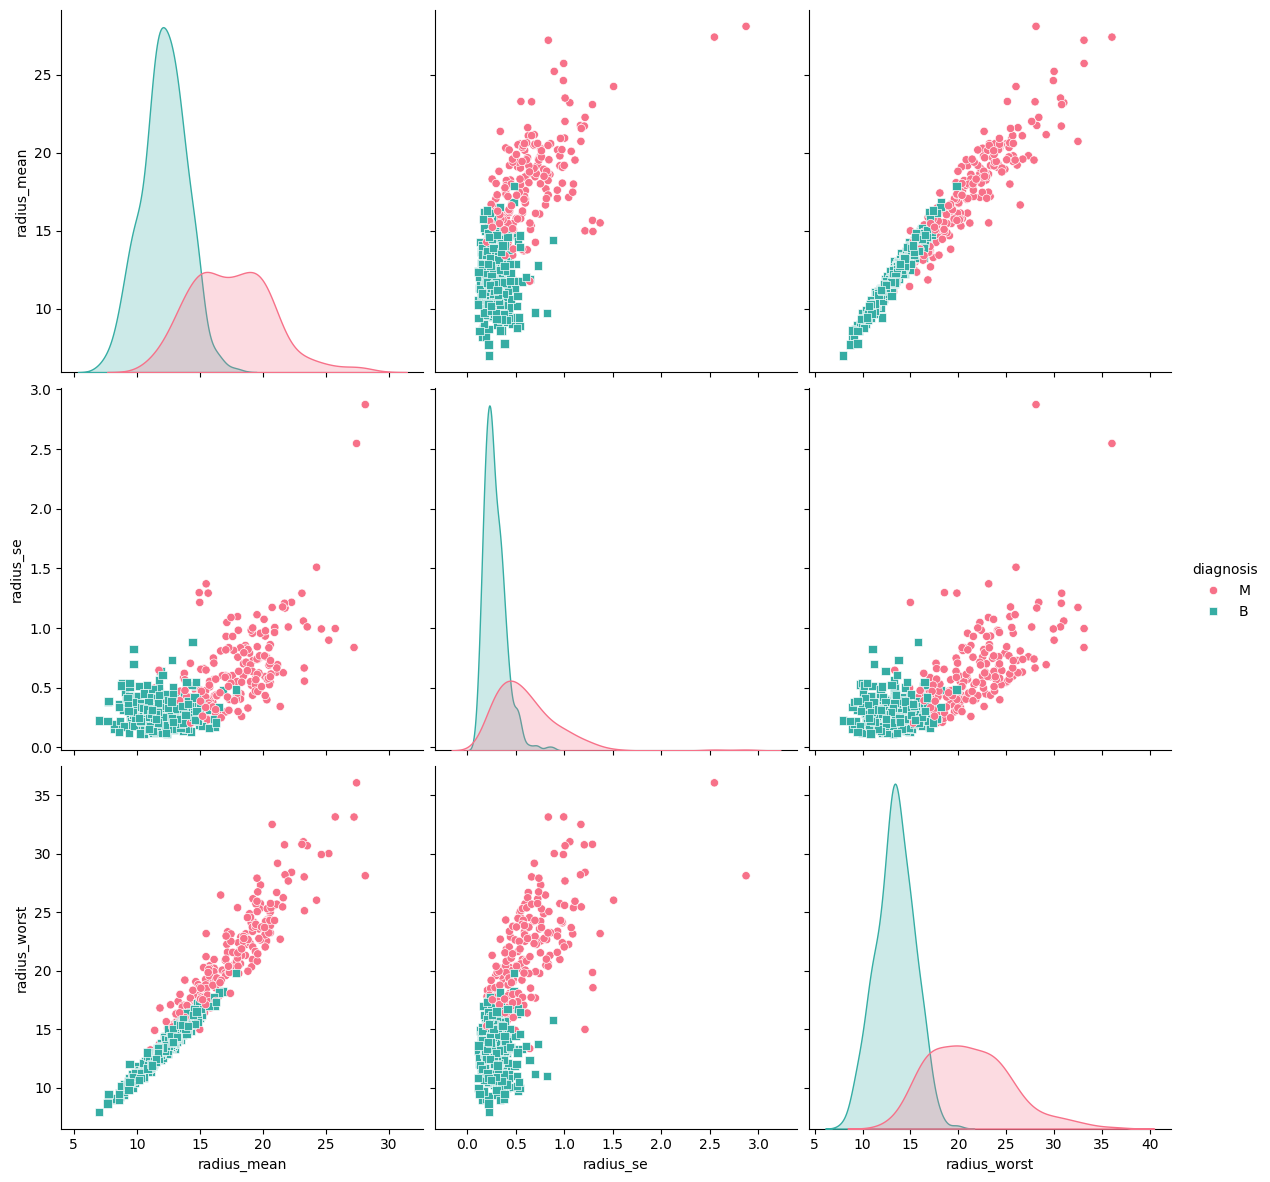

In [13]:
radius = df[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


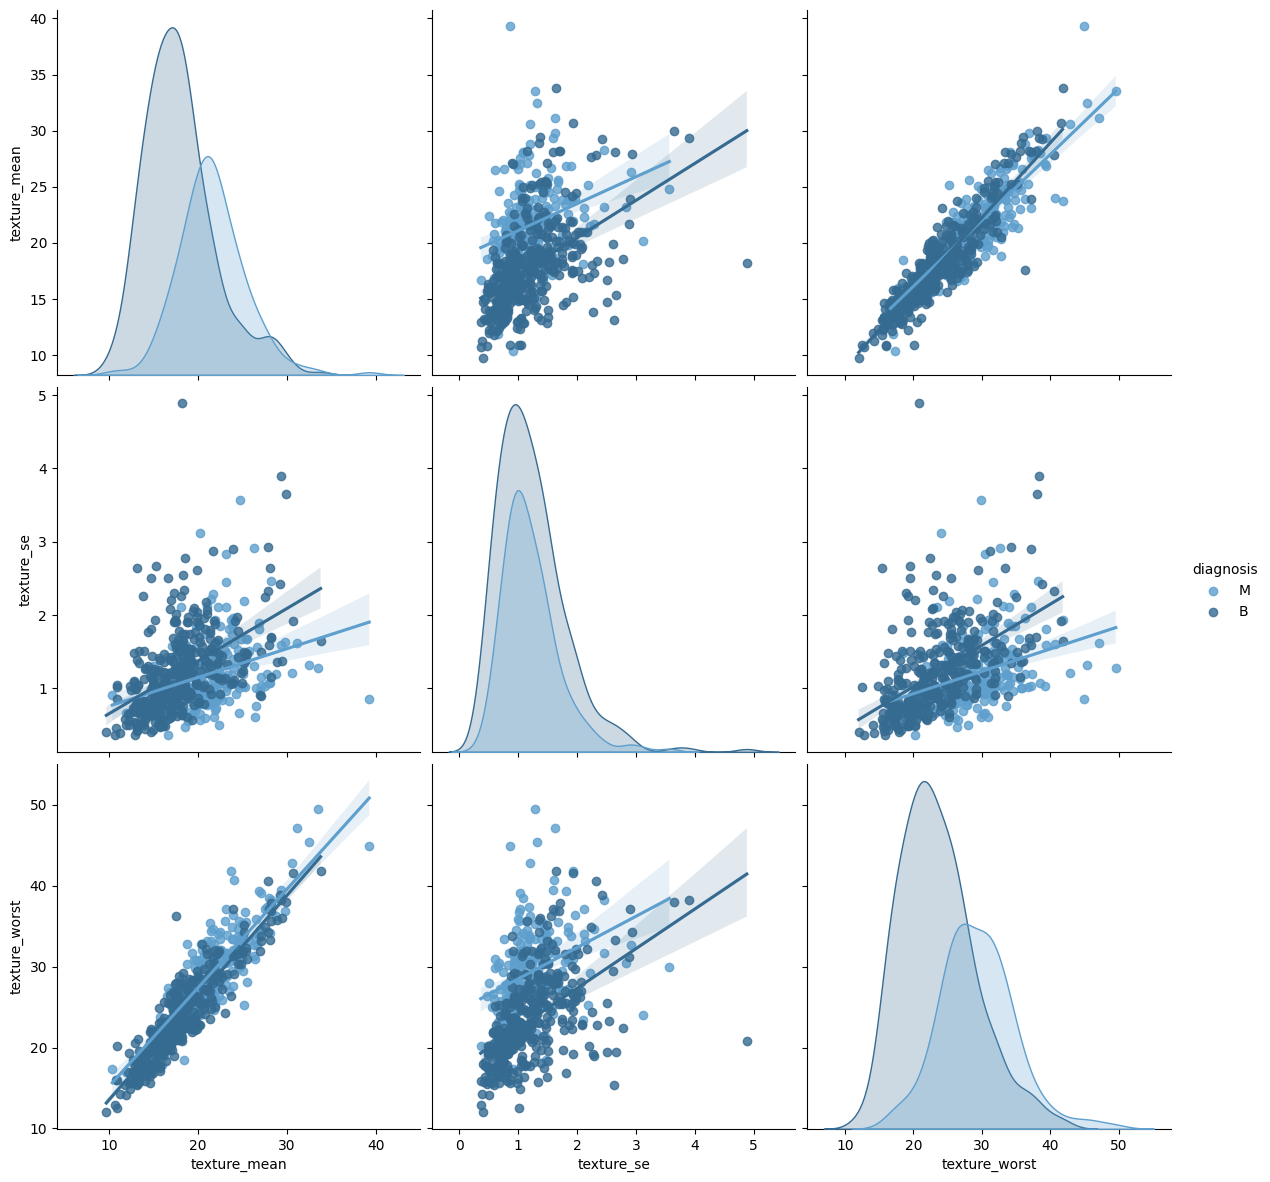

In [14]:
texture = df[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis', palette="Blues_d",size=4, kind="reg")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


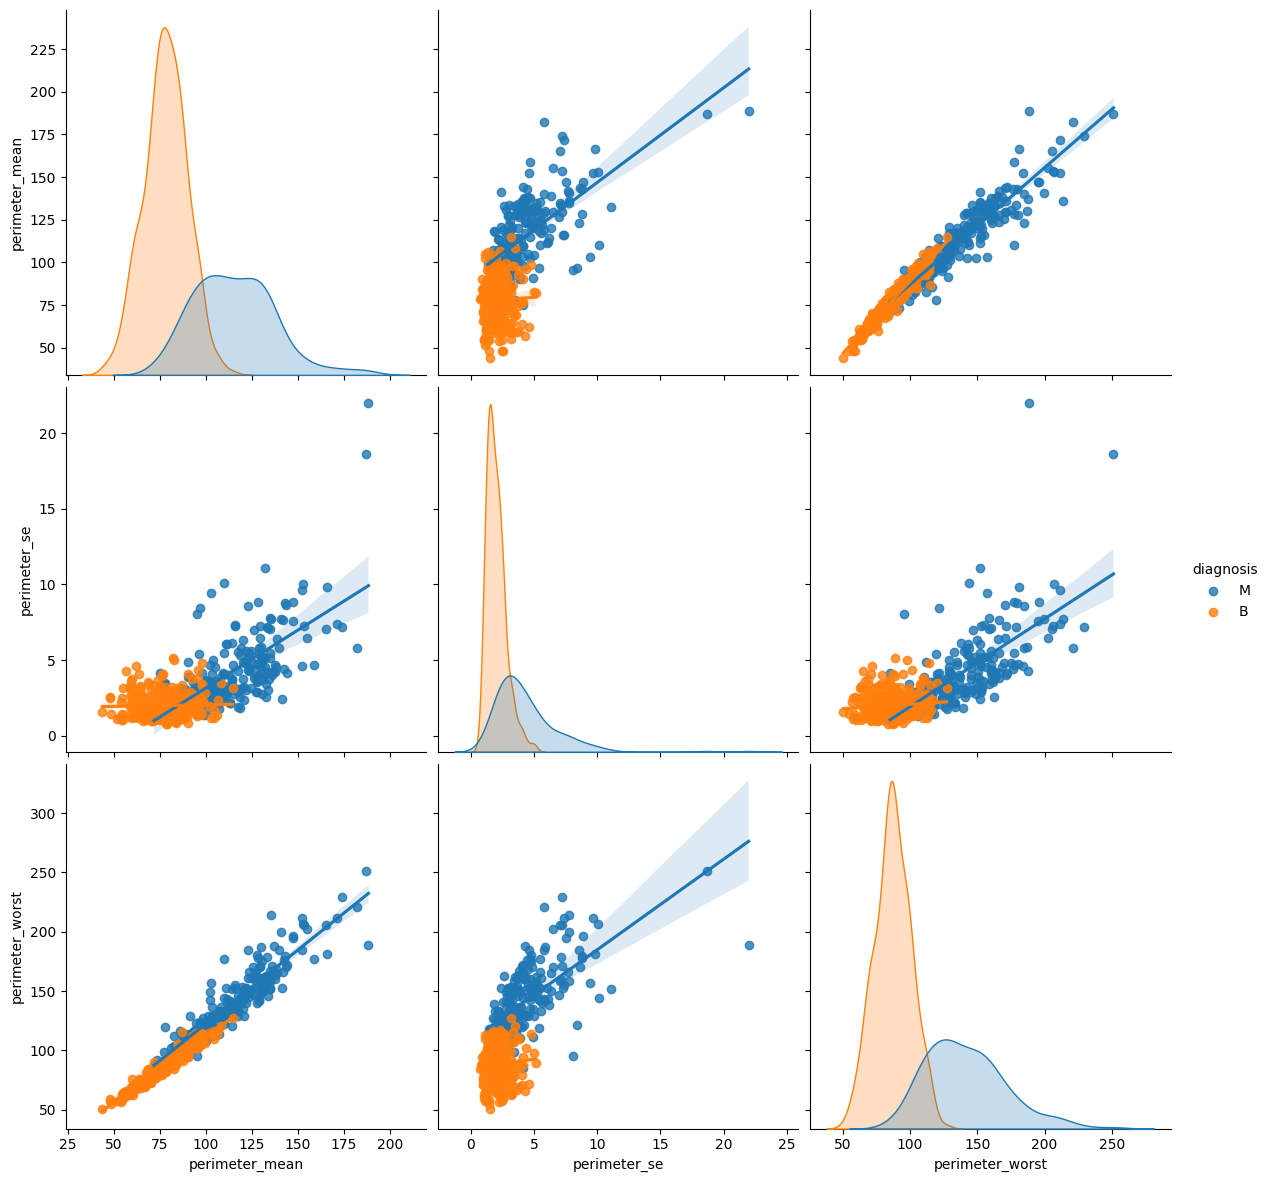

In [15]:
perimeter = df[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis', size = 4, kind="reg")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


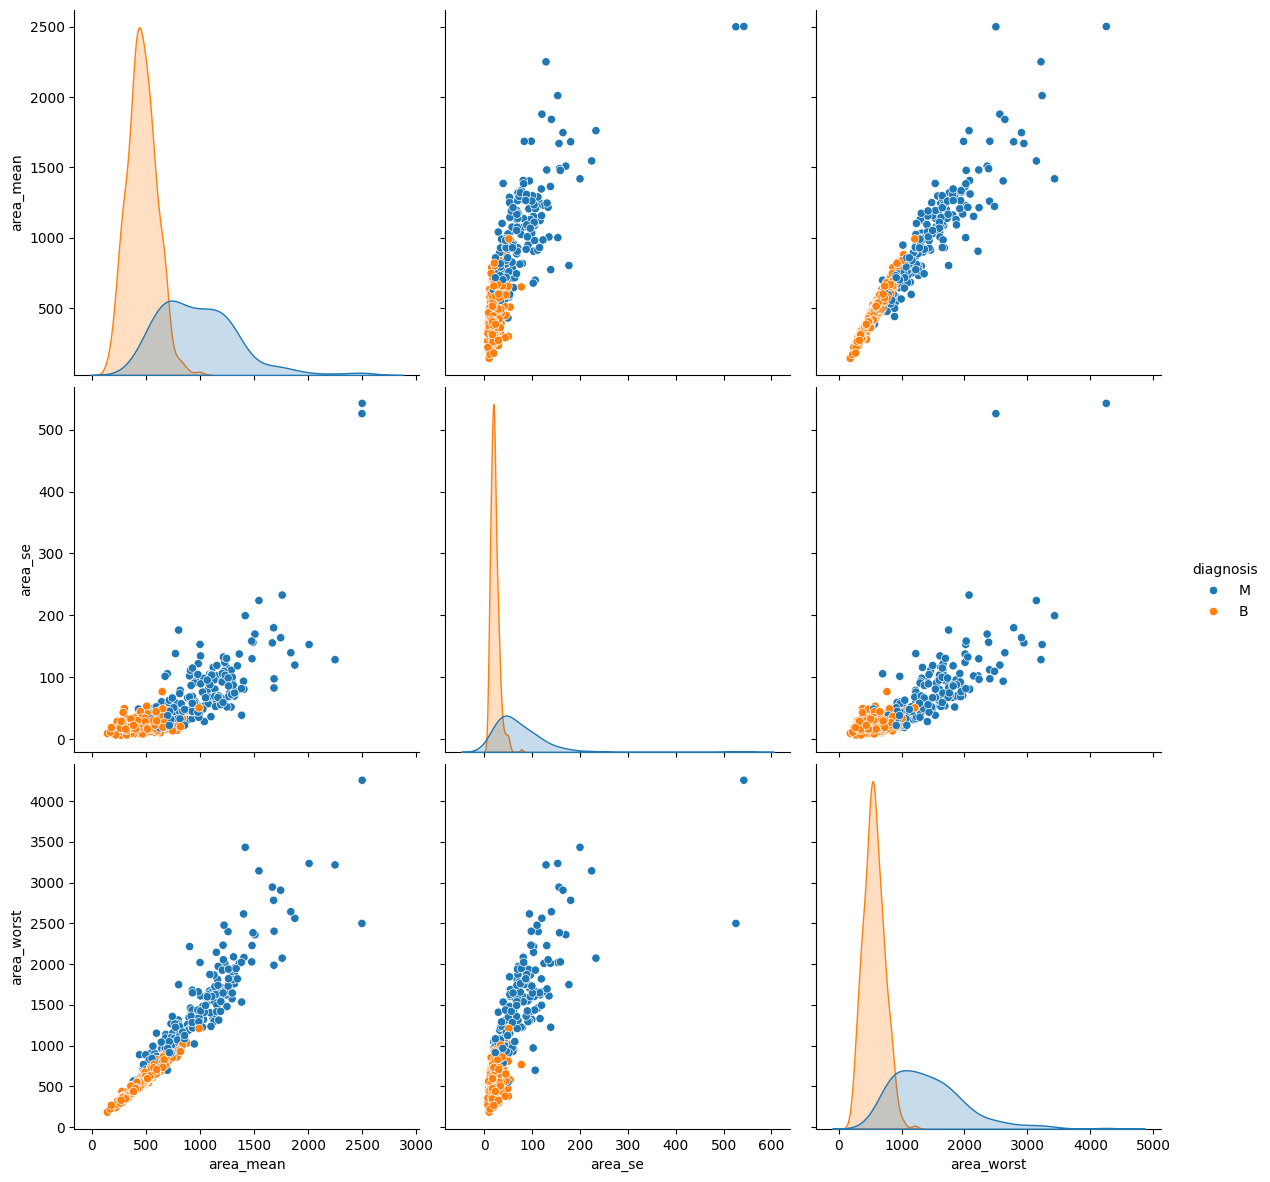

In [16]:
area = df[['area_mean','area_se','area_worst','diagnosis']]
sns.pairplot(area, hue='diagnosis', size =4)

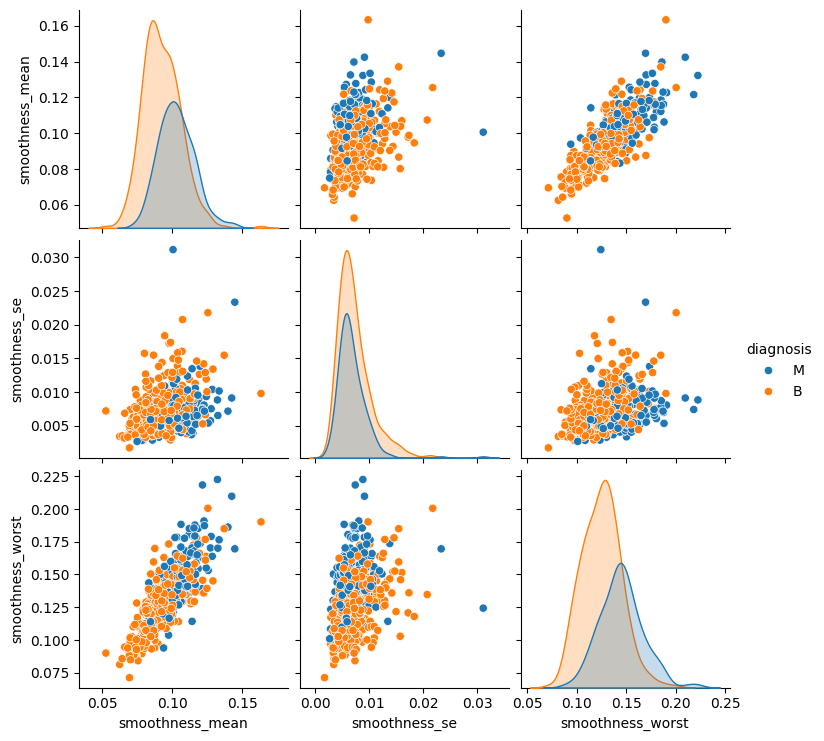

In [17]:
smoothness = df[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
sns.pairplot(smoothness, hue='diagnosis')

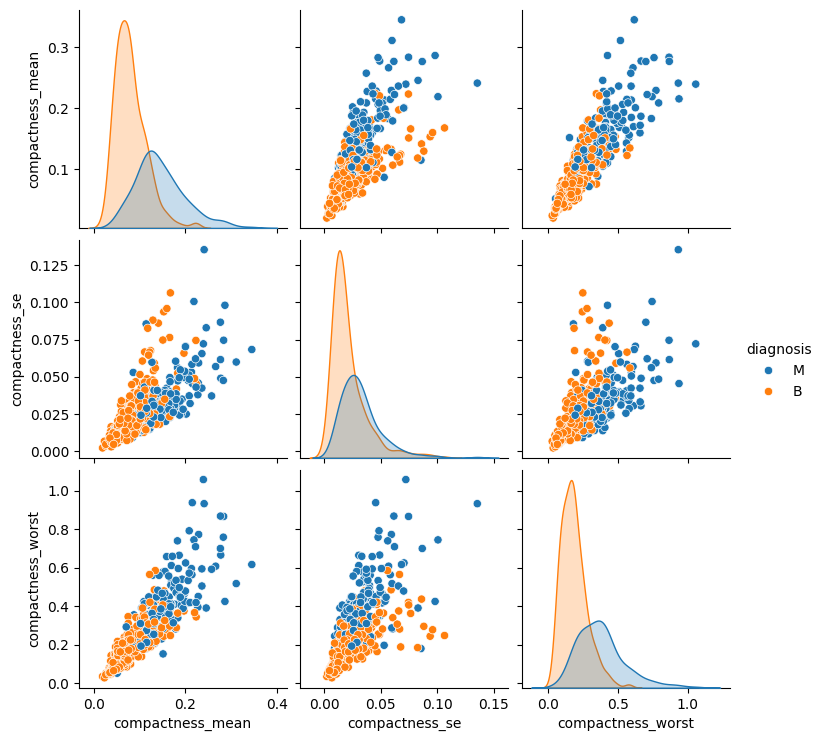

In [18]:
compactness = df[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
sns.pairplot(compactness, hue='diagnosis')

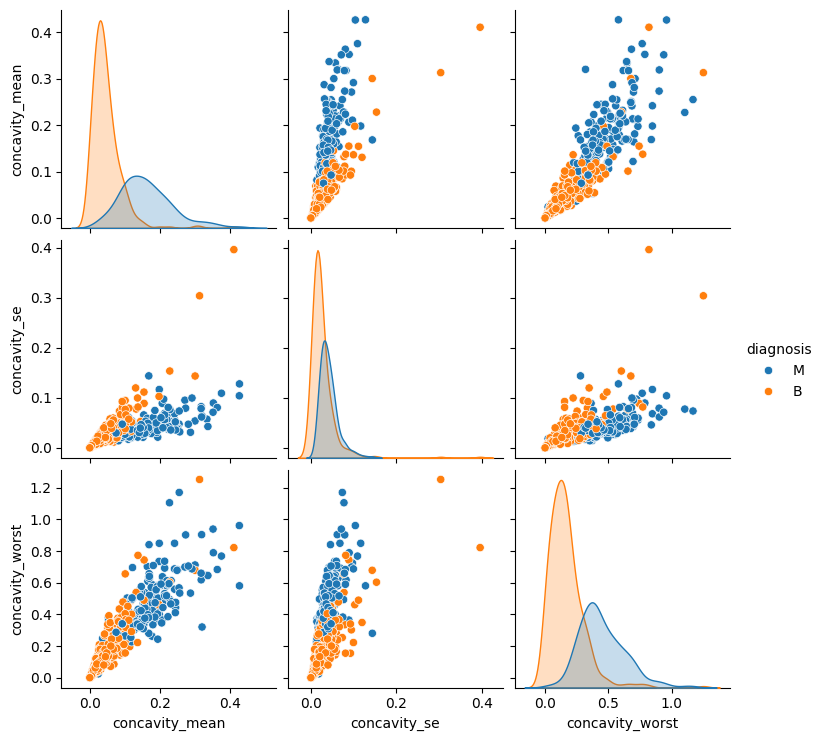

In [19]:
concavity = df[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
sns.pairplot(concavity, hue='diagnosis')

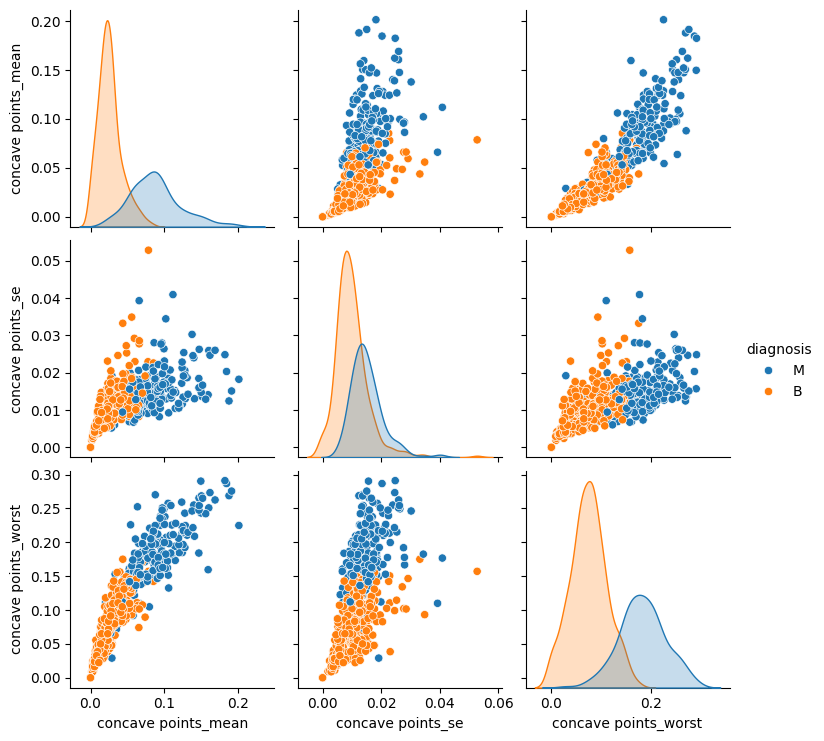

In [20]:
concave_points = df[['concave points_mean','concave points_se','concave points_worst','diagnosis']]
sns.pairplot(concave_points, hue='diagnosis')

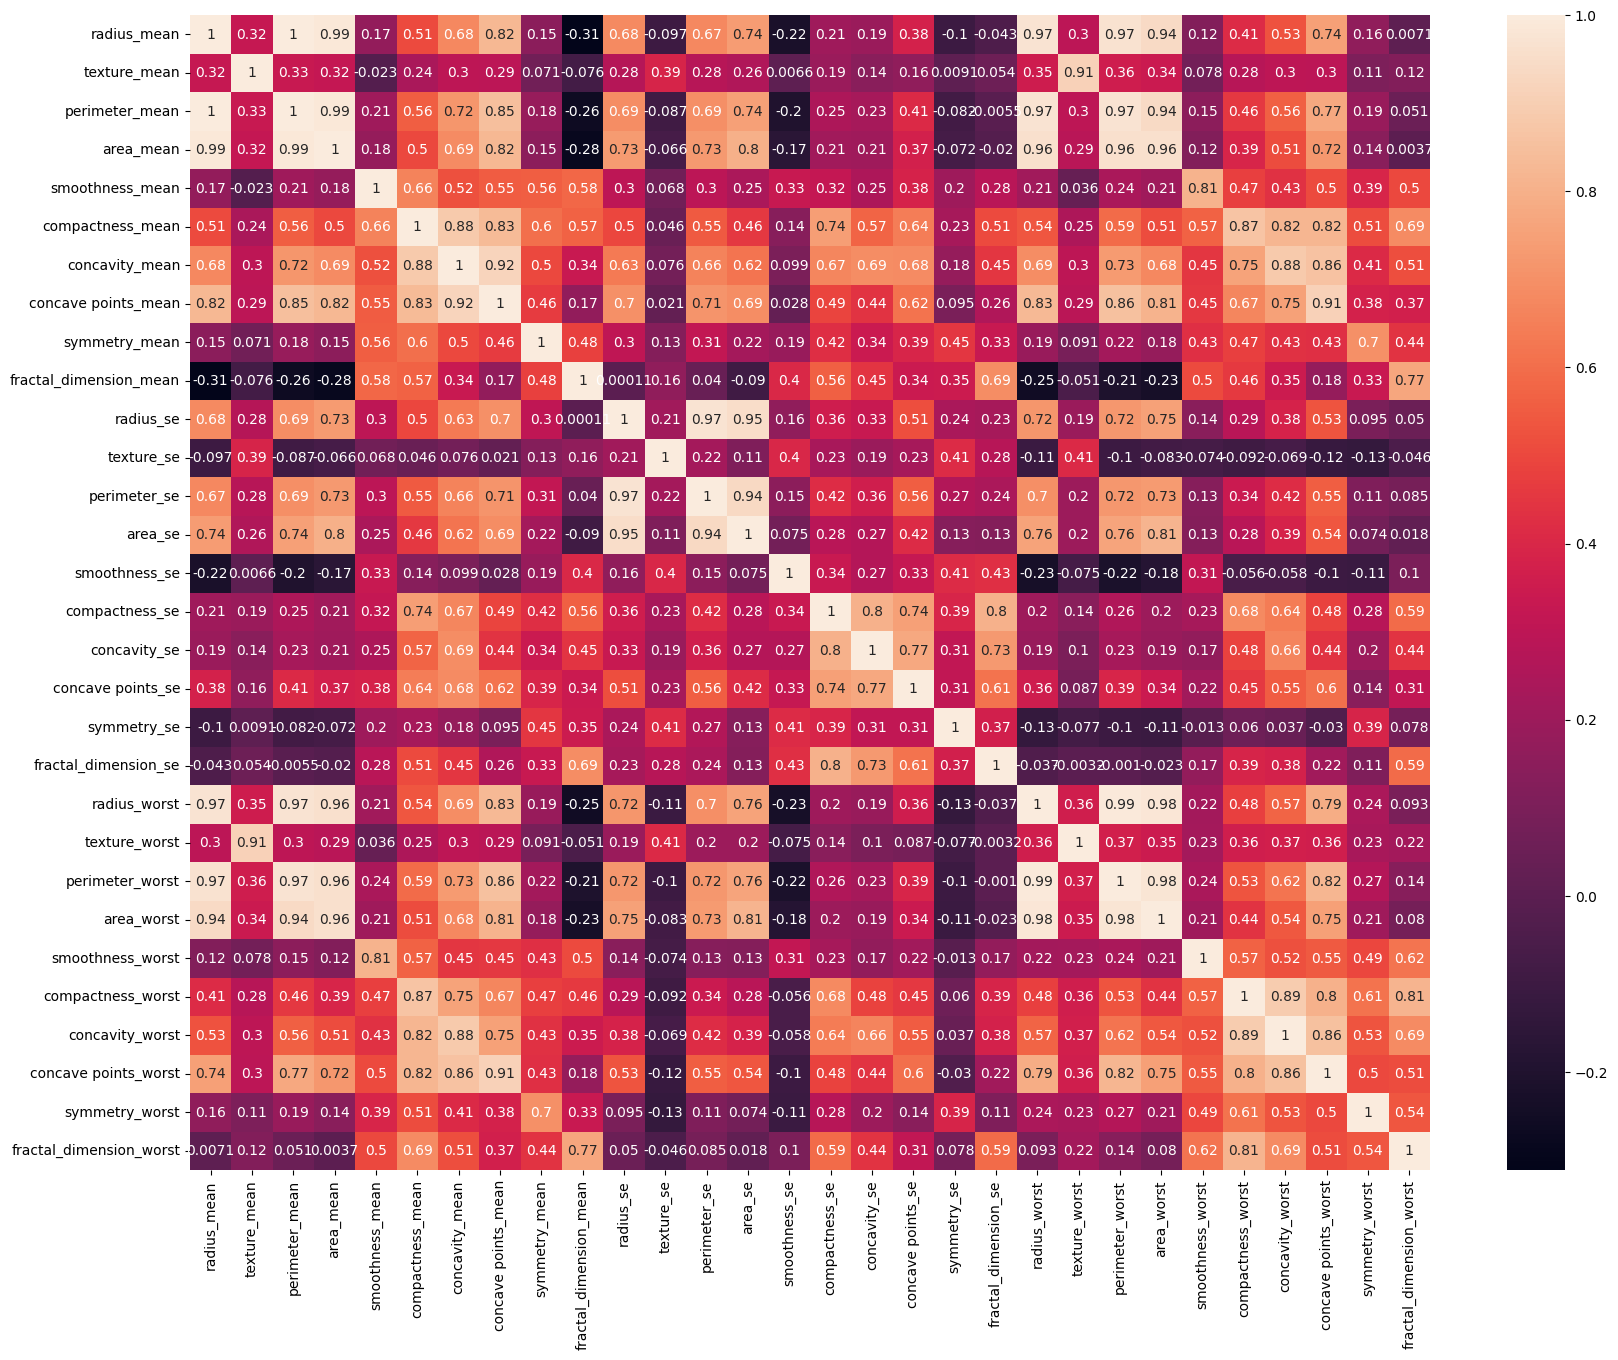

In [21]:
df_temp=df.drop(['diagnosis'],axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(df_temp.corr(), annot=True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [22]:
# Encode diagnosis: 'M' → 1, 'B' → 0
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [23]:
df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


<Axes: xlabel='diagnosis'>

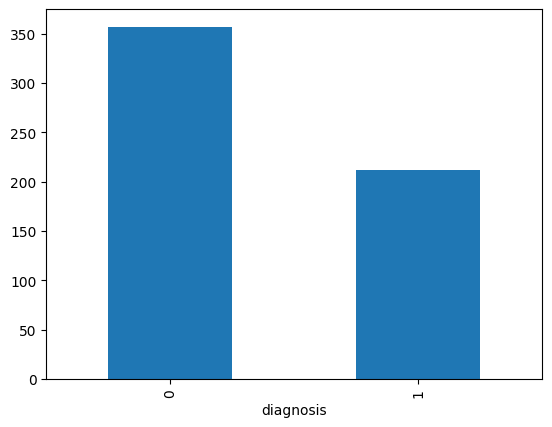

In [24]:
df['diagnosis'].value_counts().plot(kind='bar')

In [25]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [26]:
x.shape

(569, 30)

In [27]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


### **Train-Test-Split**

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
print(f'Total datasets: {len(x)}')
print(f'Total data Latih: {len(x_train)}')
print(f'Total data Uji: {len(x_test)}')

Total datasets: 569
Total data Latih: 455
Total data Uji: 114


### **Normalisasi**

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
print("Data Training (Scaled):\n", x_train[:5])  # 5 baris pertama
print("\nData Test (Scaled):\n", x_test[:5])

Data Training (Scaled):
 [[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
  -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
  -0.12095781 -0.35077918  0.57276579  0.7394992   0.32065553  0.58946222
   2.6150405

## **Model Development**

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik.

In [33]:
# Model Pertama
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix for Random Forest:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for Random Forest:
[[70  1]
 [ 3 40]]
____________________________________________________________________________________________________
num of True Positive : 40
num of True Negative : 70
num of False Positive : 1
num of False Negative : 3


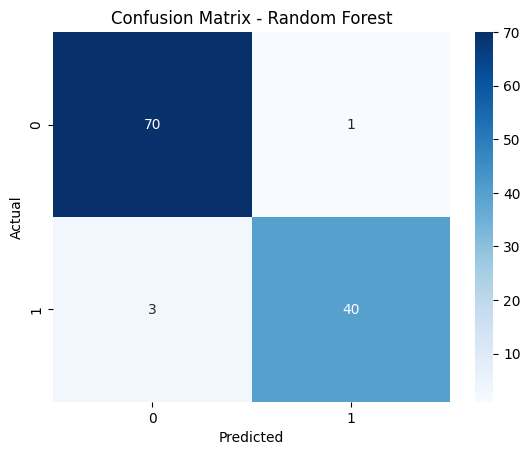

In [35]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Tampilkan confusion matrix untuk Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")

In [36]:
# Model kedua

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix for LogisticRegression:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for LogisticRegression:
[[70  1]
 [ 2 41]]
____________________________________________________________________________________________________
num of True Positive : 41
num of True Negative : 70
num of False Positive : 1
num of False Negative : 2


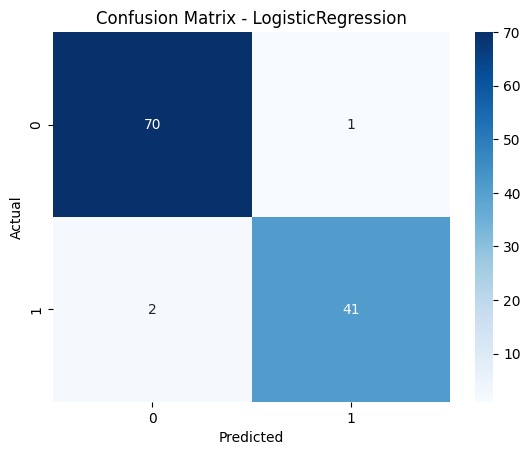

In [38]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Tampilkan confusion matrix untuk Random Forest
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix - LogisticRegression")

In [39]:
# Model ketiga

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [40]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix for SVM:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for SVM:
[[71  0]
 [ 2 41]]
____________________________________________________________________________________________________
num of True Positive : 41
num of True Negative : 71
num of False Positive : 0
num of False Negative : 2


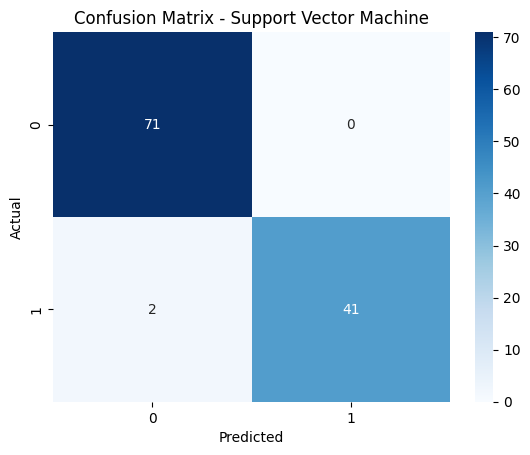

In [41]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Tampilkan confusion matrix untuk Random Forest
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix - Support Vector Machine")

## **Evaluasi Model**

In [42]:
# Data uji (y_test) dan prediksi dari masing-masing model
y_pred_rf = rf_model.predict(x_test)  # Prediksi dari Random Forest
y_pred_lr = lr_model.predict(x_test)  # Prediksi dari Logistic Regression
y_pred_svm = svm_model.predict(x_test)  # Prediksi dari SVM

# Menghitung akurasi masing-masing model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Menampilkan hasil akurasi
print("Akurasi Random Forest:", accuracy_rf)
print("Akurasi Logistic Regression:", accuracy_lr)
print("Akurasi Support Vector Machine:", accuracy_svm)

Akurasi Random Forest: 0.9649122807017544
Akurasi Logistic Regression: 0.9736842105263158
Akurasi Support Vector Machine: 0.9824561403508771


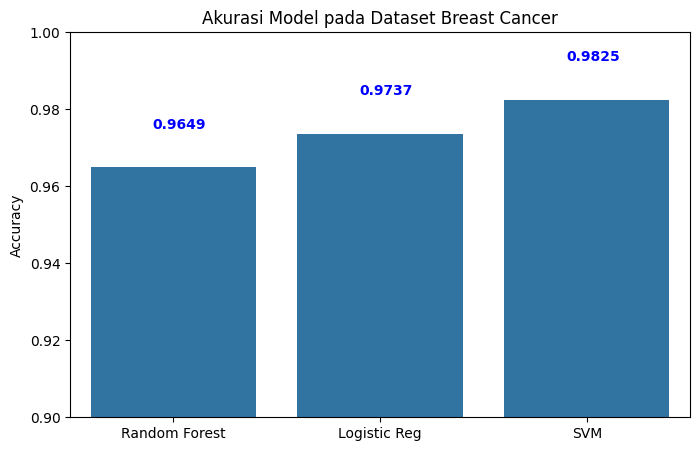

In [43]:
plt.figure(figsize=(8, 5))
models = ['Random Forest', 'Logistic Reg', 'SVM']
acc_scores = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm)
]
sns.barplot(x=models, y=acc_scores)
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Akurasi Model pada Dataset Breast Cancer')
for i, v in enumerate(acc_scores):
    plt.text(i-0.1, v+0.01, f"{v:.4f}", color='blue', fontweight='bold')
plt.show()

Di lihat dari output tersebut dapat diketahui bahwa model dengan algoritma SVM memiliki Accuracy yang lebih tinggi dengan accuracy 98% . Untuk itu model tersebut yang akan dipilih untuk digunakan.